In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
import json

In [13]:
def apply_linear(xs: np.ndarray) -> float:
    return xs[0] + xs[1] + 2 * xs[2]


def normal(x: float, mean=1, sd=1) -> float:
    return (1 / (sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (((x - mean) / sd) ** 2))


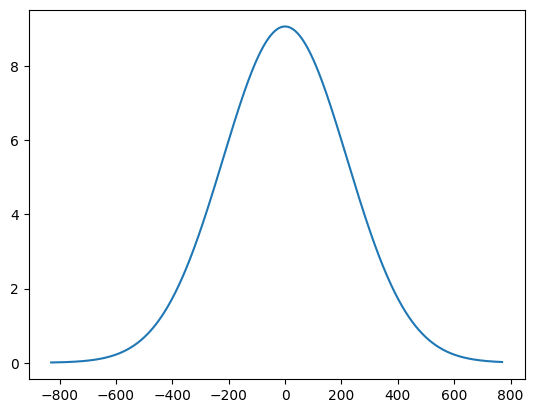

In [14]:
xs = list(map(lambda x: [[x / 6], [x / 4 - 30]], np.linspace(-800, 800, 1200)))
affined_xs = np.array(list(map(lambda x: 3 * x[0][0] + 2 * x[1][0] + 30, xs)))
ys = np.array(list(map(lambda x: 5000 * normal(x, 0, 220), affined_xs)))
fig, ax = plt.subplots()
ax.plot(affined_xs, ys)


In [15]:
def test_train_split(xs: np.ndarray, ys: np.ndarray, train_frac=0.75):
    assert len(xs) == len(ys)
    np.random.shuffle(xs)
    np.random.shuffle(ys)
    xs_train_end_idx = int(train_frac * len(xs))
    xs_train = xs[: xs_train_end_idx]
    ys_train = ys[: xs_train_end_idx]

    xs_test = xs[xs_train_end_idx:]
    ys_test = ys[xs_train_end_idx:]

    return {
        'train': {'xs': xs_train, 'ys': ys_train},
        'test': {'xs': xs_test, 'ys': ys_test},
    }


data = test_train_split(xs, ys)


def data_to_json(data):
    json_data = {
        'train': {'xs': None, 'ys': None},
        'test': {'xs': None, 'ys': None}
    }
    json_data['train']['xs'] = list(map(list, data['train']['xs']))
    json_data['test']['xs'] = list(map(list, data['test']['xs']))

    json_data['train']['ys'] = list(map(lambda x: [[x]], data['train']['ys']))
    json_data['test']['ys'] = list(map(lambda x: [[x]], data['test']['ys']))
    return json.dumps(json_data)


json_data = data_to_json(data)
with open("dataset.json", "w") as data_file:
    data_file.write(json_data)
